In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import holidays
from datetime import datetime
import re
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# data visialization for streamlit


**Authors:**  Tiago Russomano

**Last update:** 12.12.2023

** data based on the Final Notebook 2

In [2]:
df = pd.read_csv('../data/231018_merged_tables_basic_data.csv', low_memory=False, header = 0, index_col=0, na_values='n/a')

In [3]:
# store date in string format
df['date'] = df.apply(lambda row: datetime(row['an'], row['mois'], row['jour']).strftime('%Y-%m-%d'), axis = 1)
df.head()

,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,...,env1,senc,catv,occutc,obs,obsm,choc,manv,motor,date
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,138306524.0,B01,2.0,2,4,2,2002.0,0.0,1.0,0.0,...,NaN,2.0,7,NaN,0.0,2.0,5.0,23.0,1.0,2019-11-30
201900000001,138306524.0,B01,1.0,1,4,2,1993.0,5.0,1.0,0.0,...,NaN,2.0,7,NaN,0.0,2.0,5.0,23.0,1.0,2019-11-30
201900000001,138306525.0,A01,1.0,1,1,1,1959.0,0.0,1.0,0.0,...,NaN,2.0,17,NaN,1.0,0.0,3.0,11.0,1.0,2019-11-30
201900000002,138306523.0,A01,1.0,1,4,2,1994.0,0.0,1.0,0.0,...,NaN,1.0,7,NaN,4.0,0.0,1.0,0.0,1.0,2019-11-30
201900000003,138306520.0,A01,1.0,1,1,1,1996.0,0.0,1.0,0.0,...,NaN,1.0,7,NaN,0.0,2.0,1.0,2.0,1.0,2019-11-28


In [4]:
# get holiday list for France
fr_holidays = holidays.FR()
df['is_holiday'] = df.apply(lambda row: row['date'] in fr_holidays, axis = 1)
df['holiday'] = df.apply(lambda row: fr_holidays.get(row['date']) if row['is_holiday'] == True else np.nan, axis = 1)
df.head()

,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,...,catv,occutc,obs,obsm,choc,manv,motor,date,is_holiday,holiday
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,138306524.0,B01,2.0,2,4,2,2002.0,0.0,1.0,0.0,...,7,NaN,0.0,2.0,5.0,23.0,1.0,2019-11-30,False,NaN
201900000001,138306524.0,B01,1.0,1,4,2,1993.0,5.0,1.0,0.0,...,7,NaN,0.0,2.0,5.0,23.0,1.0,2019-11-30,False,NaN
201900000001,138306525.0,A01,1.0,1,1,1,1959.0,0.0,1.0,0.0,...,17,NaN,1.0,0.0,3.0,11.0,1.0,2019-11-30,False,NaN
201900000002,138306523.0,A01,1.0,1,4,2,1994.0,0.0,1.0,0.0,...,7,NaN,4.0,0.0,1.0,0.0,1.0,2019-11-30,False,NaN
201900000003,138306520.0,A01,1.0,1,1,1,1996.0,0.0,1.0,0.0,...,7,NaN,0.0,2.0,1.0,2.0,1.0,2019-11-28,False,NaN


In [5]:
df['holiday'].unique()

array([nan, 'Ascension', 'Fête de la Victoire', 'Fête du Travail',
       'Assomption', 'Lundi de Pentecôte', "Jour de l'an",
       'Lundi de Pâques', 'Noël', 'Armistice', 'Fête nationale',
       'Toussaint', 'Ascension; Fête du Travail'], dtype=object)

In [6]:
print(df.shape)

(2509598, 60)


In [9]:
df.size

150575880

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2509598 entries, 201900000001 to 201800057783
Data columns (total 60 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id_vehicule   float64
 1   num_veh       object 
 2   place         float64
 3   catu          int64  
 4   grav          int64  
 5   sexe          int64  
 6   an_nais       float64
 7   trajet        float64
 8   secu1         float64
 9   secu2         float64
 10  secu3         float64
 11  locp          float64
 12  actp          object 
 13  etatp         float64
 14  secu          float64
 15  an            int64  
 16  mois          int64  
 17  jour          int64  
 18  hrmn          object 
 19  lum           int64  
 20  agg           int64  
 21  int           int64  
 22  atm           float64
 23  col           float64
 24  com           object 
 25  adr           object 
 26  gps           object 
 27  lat           float64
 28  long          float64
 29  dep           int64  
 30  metropo

In [7]:
#calculate missing values of each colum
percent_missing = round(df.isnull().sum() * 100 / len(df), 1)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
percent_missing

id_vehicule     85.4
num_veh          0.0
place            4.9
catu             0.0
grav             0.0
sexe             0.0
an_nais          0.2
trajet           0.0
secu1           85.4
secu2           85.4
secu3           85.4
locp             2.2
actp             2.2
etatp            2.2
secu            16.9
an               0.0
mois             0.0
jour             0.0
hrmn             0.0
lum              0.0
agg              0.0
int              0.0
atm              0.0
col              0.0
com              0.0
adr             13.7
gps             56.3
lat             42.5
long            42.8
dep              0.0
metropolitan     0.0
catr             0.0
voie             9.0
v1              56.4
v2              95.2
circ             0.1
nbv              0.2
vosp             0.3
prof             0.2
pr              40.7
pr1             40.8
plan             0.2
lartpc          19.7
larrout         10.2
surf             0.2
infra            0.5
situ             0.5
vma          

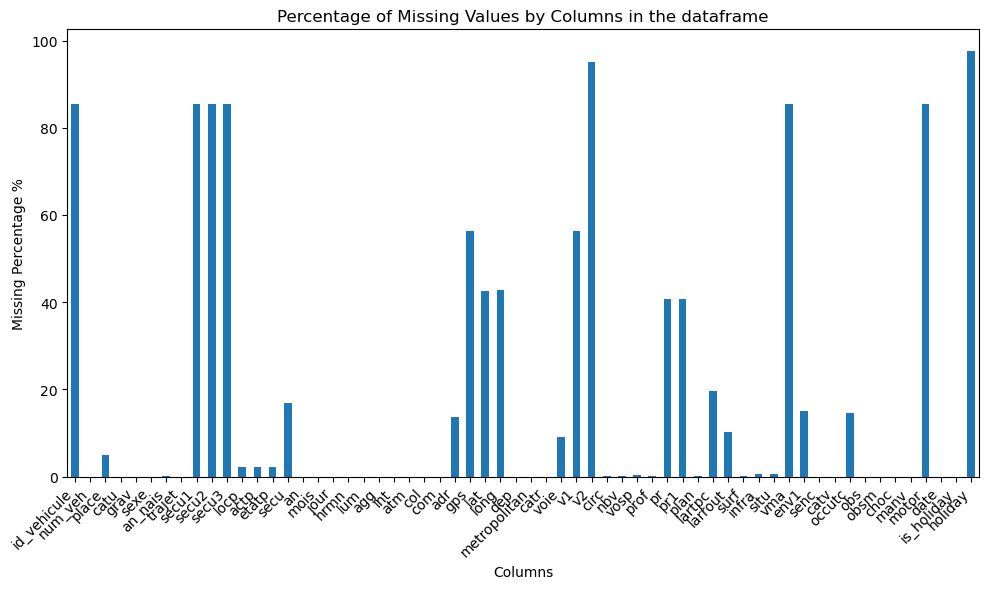

In [12]:
# bar plot of the missing percentages values of each colum
plt.figure(figsize=(10, 6))
percent_missing.plot(kind='bar')
plt.title('Percentage of Missing Values by Columns in the dataframe')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
#cleaning of the dataset regarding missing values

#delete columns id_vehicule, com, gps, voie, v1, v2, pr, pr1, lartpc, larrout, vma, env1, motor, secu1, 
#secu2, secu3, secu

df.drop(['id_vehicule', 'com', 'gps', 'voie', 'v1', 'v2',
         'pr', 'pr1', 'lartpc', 'larrout', 'vma', 'env1', 'motor', 
         'secu', 'secu1', 'secu2', 'secu3'], axis=1, inplace=True)


In [14]:
#replace NaN with -1 (coded as no information) in columns
#place, an_nais, trajet, locp, actp, etatp ,atm, col, circ, nbv, vosp, prof, plan, surf, infra
#situ, senc, occutc, obs, obsm, choc, manv

df.fillna({'place':-1, 'an_nais':-1, 'trajet':-1, 'locp':-1, 'actp': -1,
           'etatp':-1, 'atm':-1, 'col':-1, 'circ':-1, 
           'nbv':-1, 'vosp':-1, 'prof':-1, 'plan': -1, 
           'surf':-1, 'infra':-1, 'situ': -1, 'senc':-1, 'occutc':-1, 
           'obs': -1, 'obsm': -1, 'choc':-1, 'manv':-1}, inplace=True)

In [15]:
#remove lines with NaN in column catr

df.dropna(subset=['catr'], inplace=True)


In [16]:
#transform date to datetime
df['date'] =  pd.to_datetime(df['date'], format="%Y-%m-%d")

df['date'] = df['date'].dt.date

df['date'].describe()

count        2509596
unique          6209
top       2005-12-16
freq             832
Name: date, dtype: object

In [17]:
percent_missing_clean = round(df.isnull().sum() * 100 / len(df), 1)
percent_missing_clean

num_veh          0.0
place            0.0
catu             0.0
grav             0.0
sexe             0.0
an_nais          0.0
trajet           0.0
locp             0.0
actp             0.0
etatp            0.0
an               0.0
mois             0.0
jour             0.0
hrmn             0.0
lum              0.0
agg              0.0
int              0.0
atm              0.0
col              0.0
adr             13.7
lat             42.5
long            42.8
dep              0.0
metropolitan     0.0
catr             0.0
circ             0.0
nbv              0.0
vosp             0.0
prof             0.0
plan             0.0
surf             0.0
infra            0.0
situ             0.0
senc             0.0
catv             0.0
occutc           0.0
obs              0.0
obsm             0.0
choc             0.0
manv             0.0
date             0.0
is_holiday       0.0
holiday         97.7
dtype: float64

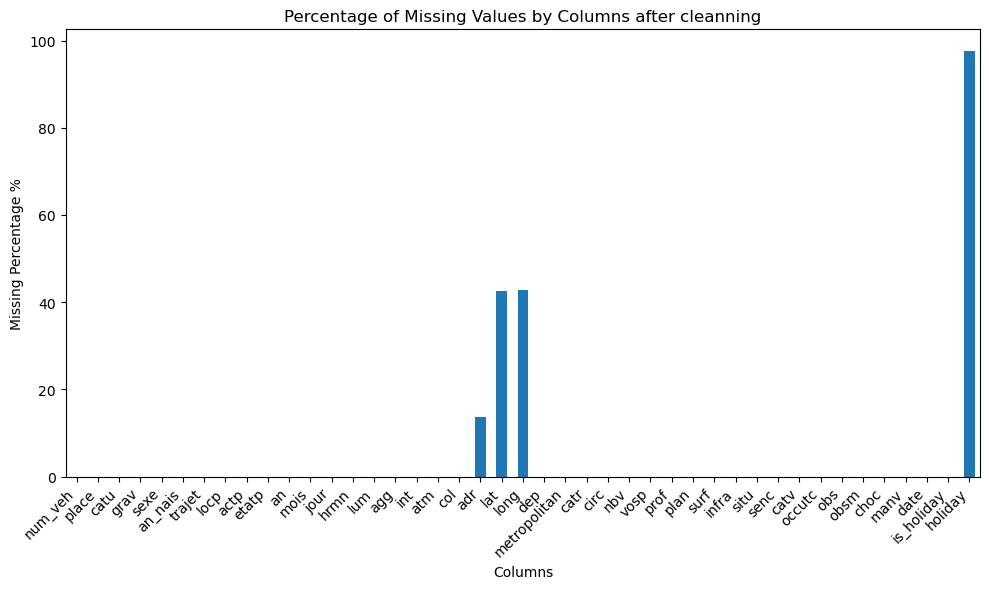

In [18]:
# bar plot of the missing percentages values of each colum
plt.figure(figsize=(10, 6))
percent_missing_clean.plot(kind='bar')
plt.title('Percentage of Missing Values by Columns after cleanning')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Transform data types
### Date and time variables
The date and time variables are maybe important as grouping variables or as contrains for time dependent severity of accidents.

For the grouping, a timestamp is required for unbiased identification time related accidents.

_Problem_:

During the transformation of the `hrmn` variable, I got aware, that the string contain integers like `1`,  `801`, or `1300`. Hence, anytime during data conversion, the colon got lost and the values got truncated. Hence `1` should be `00:01` and so on. Therefore, we need an additional transformation of the truncated data to `hh:mm` format.

**Steps:**
1. Fixing the truncated values in `hrmn`

~~3. Creation of a `datatime` variable in format y-m-d hh:mm~~

~~4. Transformation of the datatime varible to a `timestamp` variable~~


In addition, we need to transform the type of `an_nais` to integer and `date` to `date`.

In [19]:
# Fixing the hrmn issue:
# Remove the colon
df['hrmn'] = df.apply(lambda x: re.sub(string=x['hrmn'], pattern=':', repl=''), axis = 1)

# Pad the string to four zeros
df['hrmn'] = df.apply(lambda x: x['hrmn'].zfill(4), axis = 1)

# Transform the variable to 'hh:mm' and split to hours and minutes
df = df.assign(hrmn = pd.to_datetime(df['hrmn'], format='%H%M').dt.strftime('%H:%M'))

# Create the daytime variable
df['datetime'] = df.apply(lambda x: datetime(x['an'], x['mois'], x['jour'], datetime.strptime(x['hrmn'], "%H:%M").hour, datetime.strptime(x['hrmn'], "%H:%M").minute), axis = 1)

# Create the timestamp
#df['timestamp'] = df.apply(lambda x: datetime.timestamp(x['datetime']), axis = 1)

# Transform `an_nais`
df['an_nais'] = df['an_nais'].astype('int64')


### this is not working 
# Transform `date`
#df = df.assign(date = pd.to_datetime(df['date'], format='mixed'))


## Exploring the data before filtering the target region and target variable



In [25]:
summary_stats = df.describe()




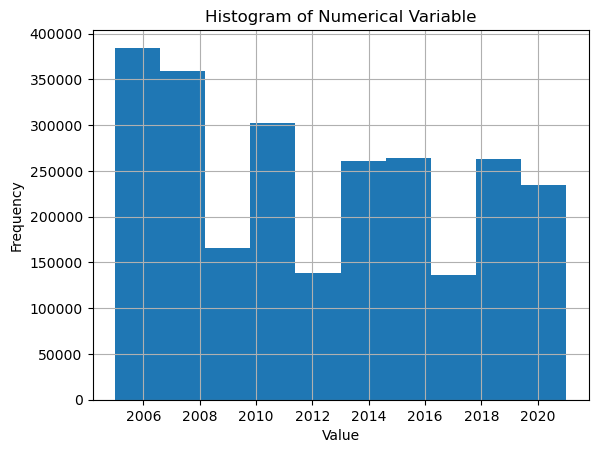

In [53]:
df['an'].hist()
plt.title('Histogram of Numerical Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

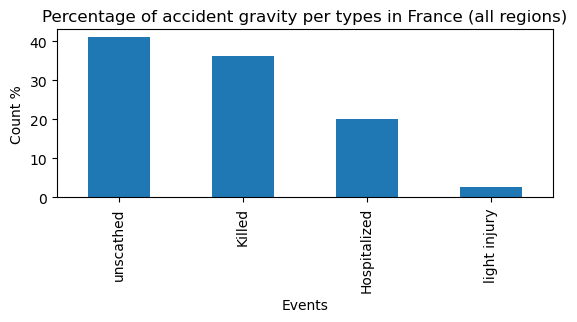

In [26]:
# exploring the types of accidents in France all regions
event_counts = df['grav'].value_counts()
event_counts = event_counts.drop(index=-1)
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Percentage of accident gravity per types in France (all regions)')
# Display the plot
plt.show()

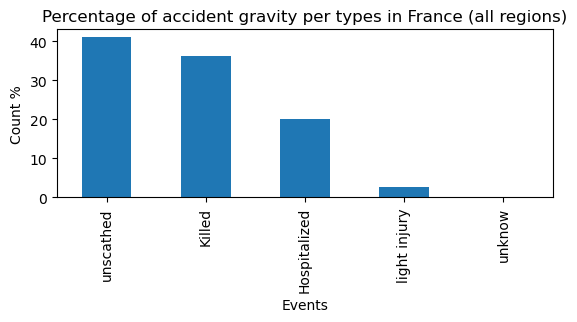

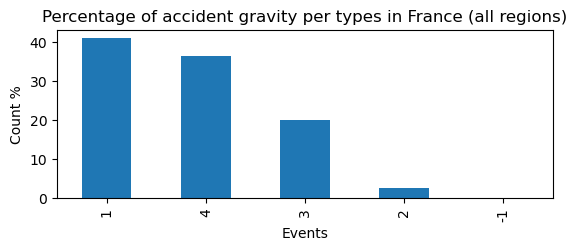

In [65]:
# exploring the types of accidents in France all regions
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Percentage of accident gravity per types in France (all regions)')
# Display the plot
plt.show()


# exploring the types of accidents in France all regions
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
#labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)))#, labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Percentage of accident gravity per types in France (all regions)')
# Display the plot
plt.show()

In [27]:
df.grav.unique()

array([ 4,  1,  3,  2, -1], dtype=int64)

Text(0.5, 1.0, 'Correlation Matrix of the numeric variables')

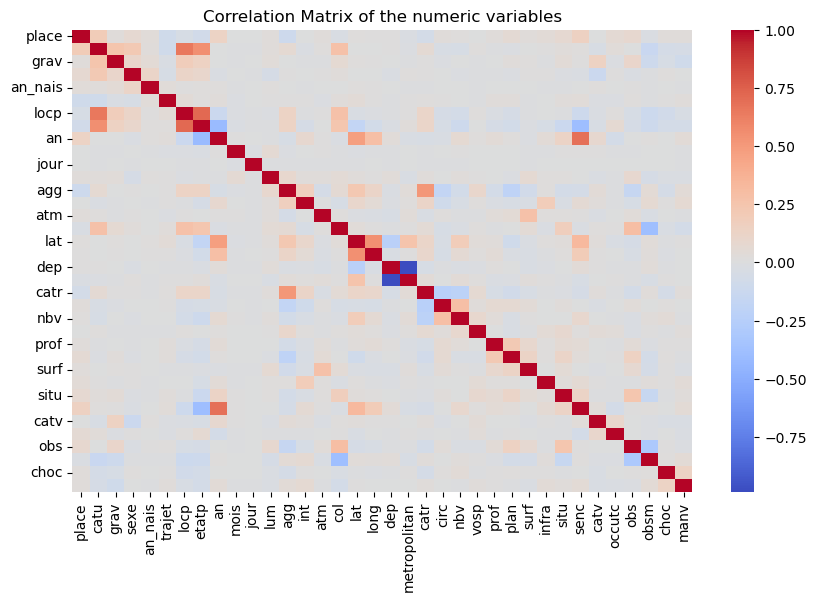

In [35]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of the numeric variables')

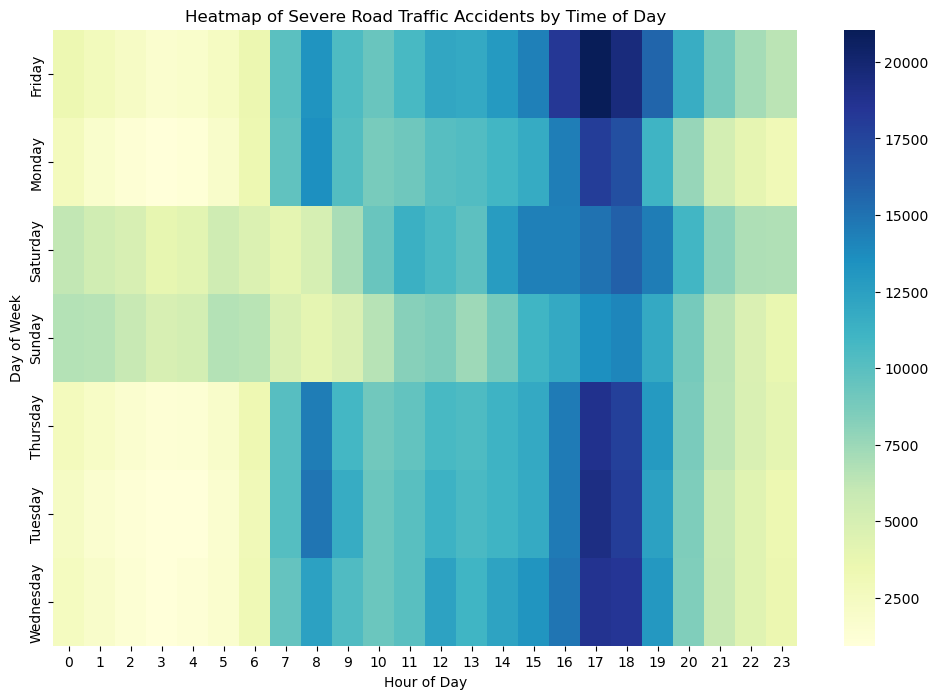

In [36]:
# exploring the days of the week with more accidents and hours.
# Convert the datetime column to a datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the day of the week
df['day_of_week'] = df['datetime'].dt.day_name()

# Extract the hour of the day
df['hour_of_day'] = df['datetime'].dt.hour

# Filter the DataFrame to include only severe accidents grav 3 and 4 for severe variable in the next notbooks 
severe_accidents = df[(df['grav'] == 4) | (df['grav'] == 3)]

# Create a pivot table and set the index order
pivot_table = severe_accidents.pivot_table(
   values='grav', index='day_of_week', columns='hour_of_day', aggfunc='count', fill_value=0)


# Create a heatmap with y-axis labels in the desired order
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, fmt='g', cbar=True)
plt.title('Heatmap of Severe Road Traffic Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


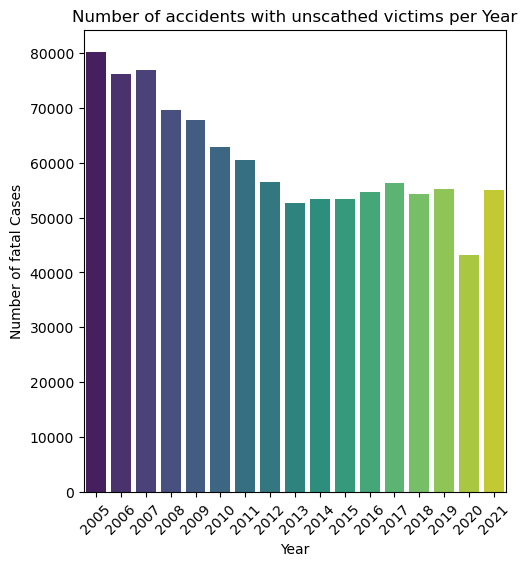

In [76]:
# explroring the number of acidents with fatal victims 
#labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
plt.figure(figsize=(12, 6))
grav_levels = [1]
# Filter data
df_filtered = df[df['grav'].isin(grav_levels)]
# Plot for Severe Cases
plt.subplot(1, 2, 1)
#sns.countplot(x='an', data=df[df['grav']== 4], palette='viridis')
sns.countplot(x='an', data=df_filtered, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of fatal Cases')
plt.title('Number of accidents with unscathed victims per Year')
plt.xticks(rotation=45)


plt.show()

d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


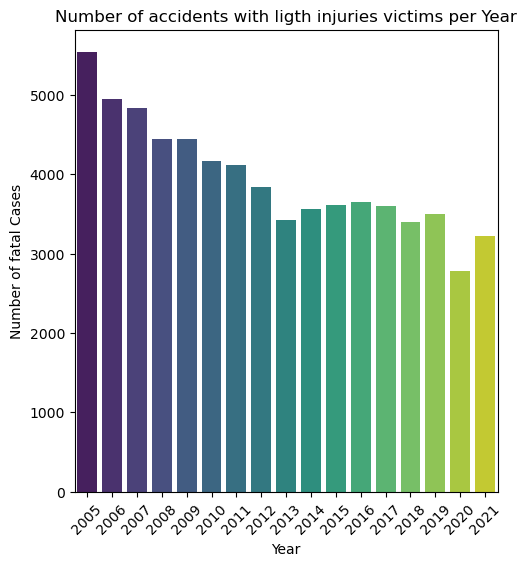

In [79]:
# explroring the number of acidents with fatal victims 
#labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
plt.figure(figsize=(12, 6))
grav_levels = [2]
# Filter data
df_filtered = df[df['grav'].isin(grav_levels)]
# Plot for Severe Cases
plt.subplot(1, 2, 1)
#sns.countplot(x='an', data=df[df['grav']== 4], palette='viridis')
sns.countplot(x='an', data=df_filtered, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of fatal Cases')
plt.title('Number of accidents with ligth injuries victims per Year')
plt.xticks(rotation=45)


plt.show()

d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


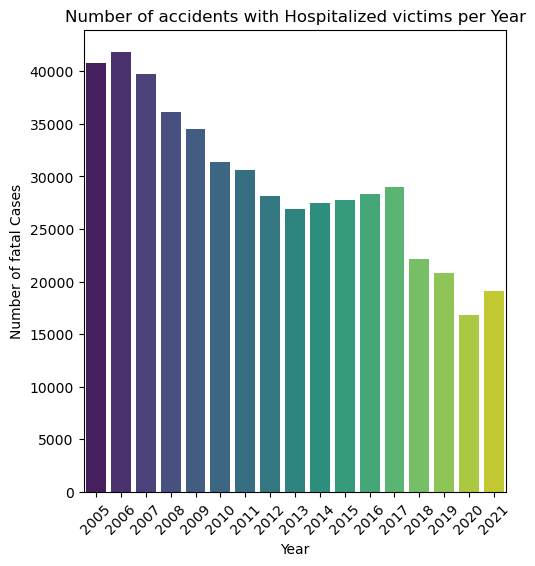

In [80]:
# explroring the number of acidents with fatal victims 
#labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
plt.figure(figsize=(12, 6))
grav_levels = [3]
# Filter data
df_filtered = df[df['grav'].isin(grav_levels)]
# Plot for Severe Cases
plt.subplot(1, 2, 1)
#sns.countplot(x='an', data=df[df['grav']== 4], palette='viridis')
sns.countplot(x='an', data=df_filtered, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of fatal Cases')
plt.title('Number of accidents with Hospitalized victims per Year')
plt.xticks(rotation=45)


plt.show()

d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda2\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


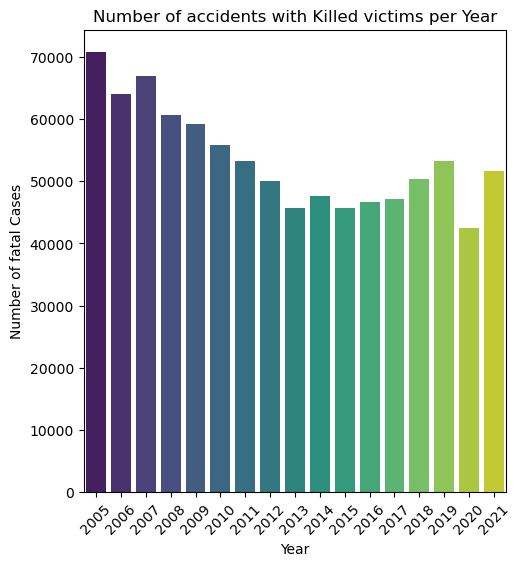

In [81]:
# explroring the number of acidents with fatal victims 
#labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
plt.figure(figsize=(12, 6))
grav_levels = [4]
# Filter data
df_filtered = df[df['grav'].isin(grav_levels)]
# Plot for Severe Cases
plt.subplot(1, 2, 1)
#sns.countplot(x='an', data=df[df['grav']== 4], palette='viridis')
sns.countplot(x='an', data=df_filtered, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of fatal Cases')
plt.title('Number of accidents with Killed victims per Year')
plt.xticks(rotation=45)


plt.show()

Text(0, 0.5, 'Count %')

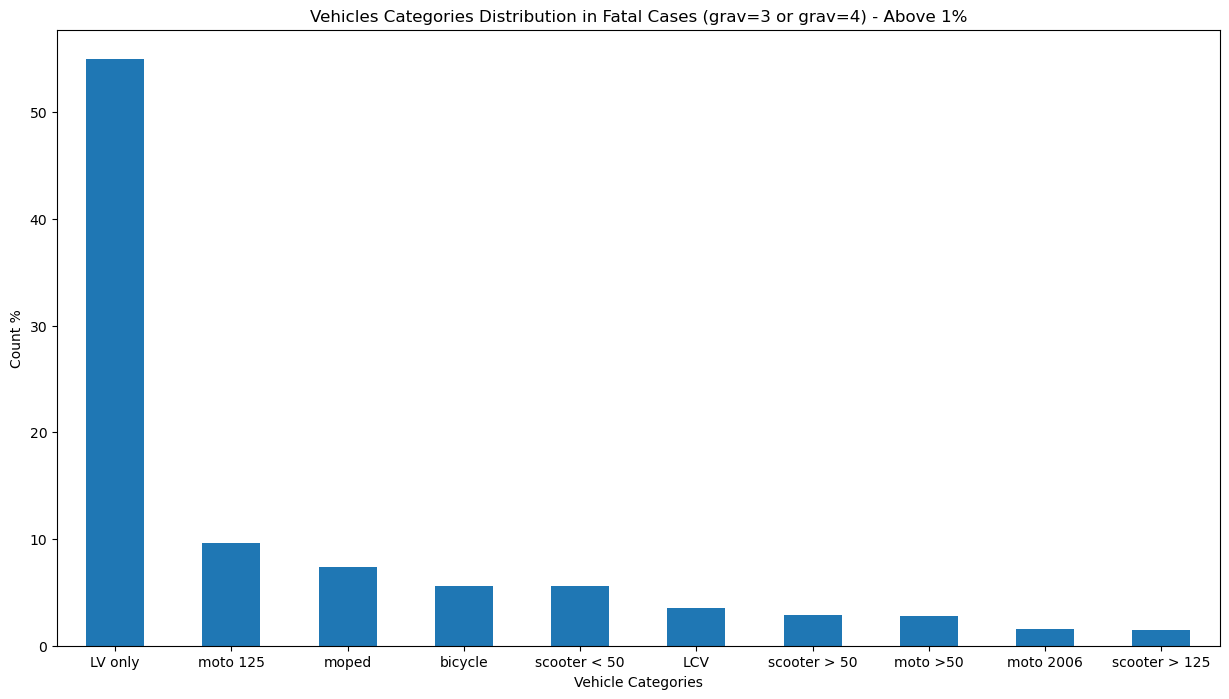

In [37]:
# exploring catv  
plt.figure(figsize=(15, 8))

# Filter the dataframe for cases where 'grav' 3 and 4
fatal_grav_3_4 = df[df['grav'].isin([3, 4])]

# Calculate event percentages
event_counts = fatal_grav_3_4['catv'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100

# Filter categories with percentage above 1% because we have more than 50 categories here
filtered_event_percentages = event_percentages[event_percentages > 1]

# Plot the distribution of vehicle categories for fatal cases with grav 3 or 4
filtered_event_percentages.plot.bar()

labels =['LV only', 'moto 125', 'moped','bicycle', 'scooter < 50', 'LCV','scooter > 50','moto >50' ,'moto 2006','scooter > 125']
plt.title('Vehicles Categories Distribution in Fatal Cases (grav=3 or grav=4) - Above 1%')
plt.xticks(range(len(filtered_event_percentages)),labels, rotation=0)
plt.xlabel('Vehicle Categories')
plt.ylabel('Count %')



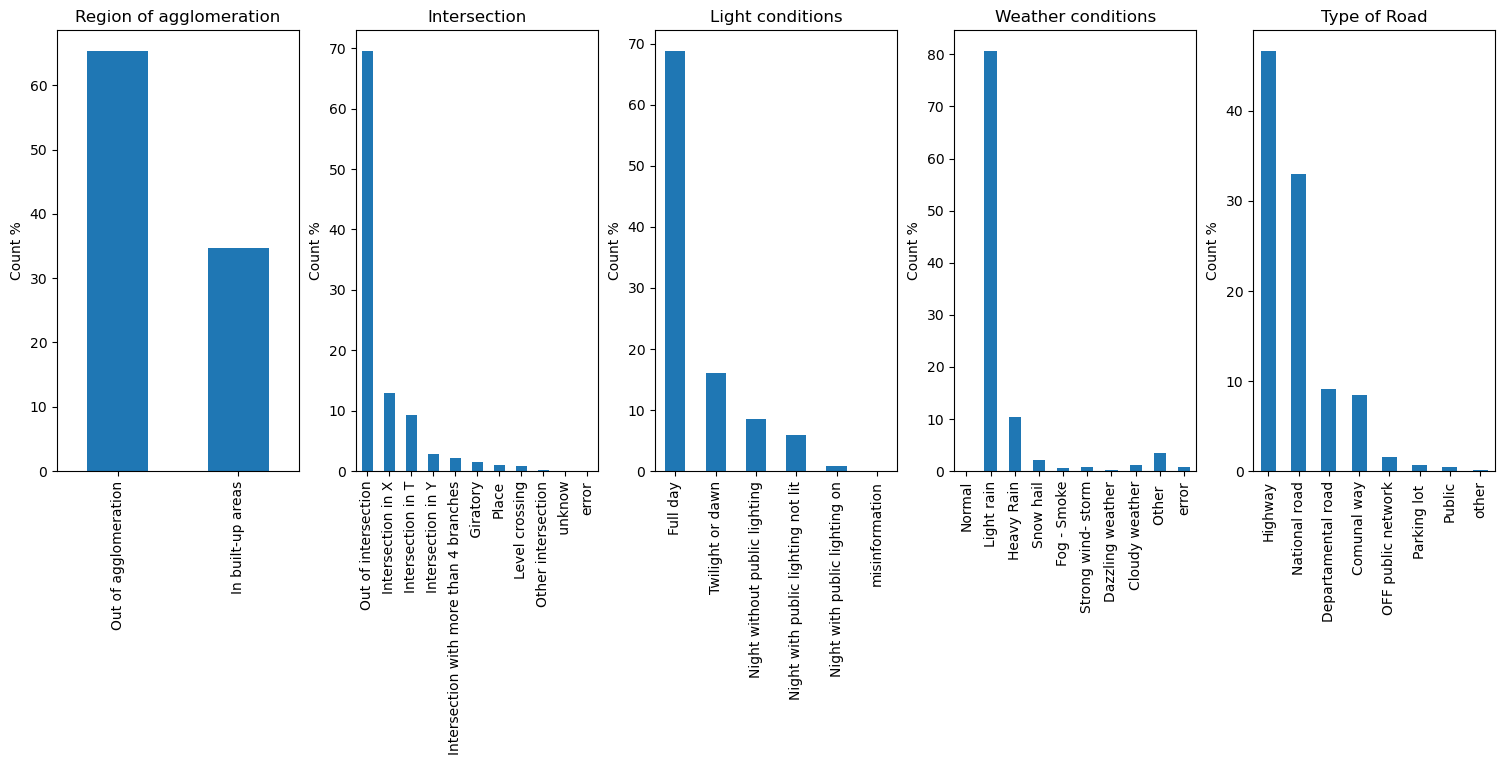

In [24]:
# exploring variables that might contribute to the accidents 
plt.figure(figsize=(15, 5))

#agglomeration
event_counts = df['agg'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(1, 5, 1)
plt.tight_layout(w_pad=3.0)
event_percentages.plot.bar()
labels = ['Out of agglomeration', 'In built-up areas']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Region of agglomeration')

# light conditions for the accidents
event_counts = df['lum'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(1, 5, 3)
event_percentages.plot.bar()
labels = ['Full day', 'Twilight or dawn', 'Night without public lighting', 'Night with public lighting not lit', 'Night with public lighting on','misinformation']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Light conditions')

# place of accident
event_counts = df['int'].value_counts()
labels = ['Out of intersection', 'Intersection in X', 'Intersection in T', 'Intersection in Y', 'Intersection with more than 4 branches',
        ' Giratory','Place' , 'Level crossing','Other intersection',' unknow', 'error']

# Add labels and title to the plot
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(1, 5, 2)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Intersection')


# weather conditions
event_counts = df['atm'].value_counts().sort_index()
labels = ['Normal', 'Light rain', 'Heavy Rain', 'Snow hail', 'Fog - Smoke','Strong wind- storm','Dazzling weather' , 'Cloudy weather',
          'Other ', 'error']

event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(1, 5, 4)
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Weather conditions')

# type of road 
event_counts = df['catr'].value_counts()

# Plot the event counts
plt.subplot(1, 5, 5)
labels = ['Highway', 'National road', 'Departamental road', 'Comunal way', 'OFF public network','Parking lot ', 'Public','other']

event_percentages = (event_counts / event_counts.sum()) * 100
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Type of Road')




#plt.subplots_adjust(wspace=0.5, hspace=1.5)
# Display the plot
plt.show()

In [25]:
cross_tab = pd.crosstab(df['atm'], df['lum'])
cross_tab

lum,-1,1,2,3,4,5
atm,,,,,,
-1.0,6,107,20,6,4,38
1.0,0,1449588,105368,150255,15239,302292
2.0,0,138839,21899,31150,3349,65599
3.0,0,29388,4679,7953,765,12510
4.0,0,8869,1605,2815,116,2430
5.0,0,5713,3381,5829,212,2467
6.0,0,3396,363,1076,65,1088
7.0,0,27486,1732,30,2,57
8.0,0,55345,7594,8977,656,12239


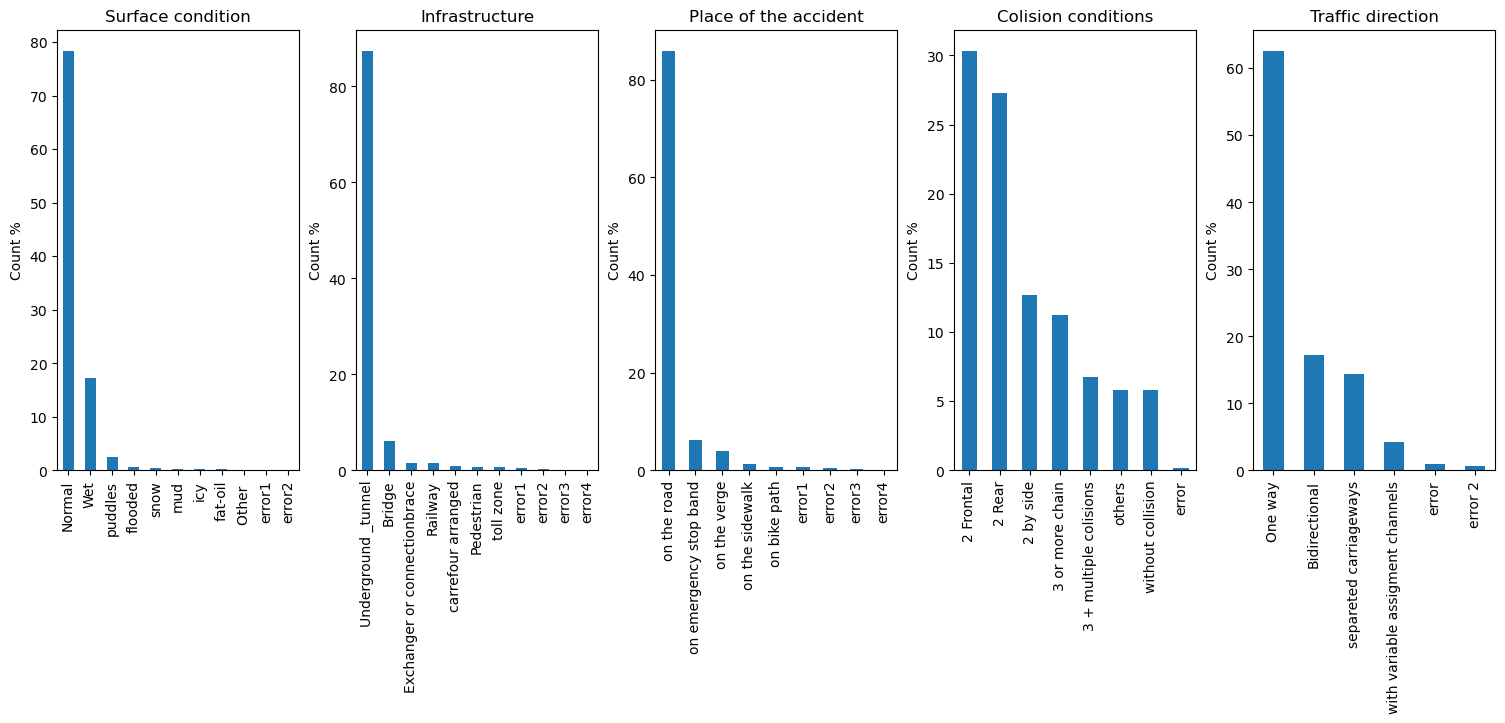

In [26]:
plt.figure(figsize=(15, 5))

# surface conditions
event_counts = df['surf'].value_counts()

# Plot the event counts
plt.subplot(1, 5, 1)
plt.tight_layout(w_pad=3.0)
labels = ['Normal', 'Wet', 'puddles', 'flooded', 'snow','mud','icy', 'fat-oil', 'Other ', 'error1','error2']
# Add labels and title to the plot
event_percentages = (event_counts / event_counts.sum()) * 100
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Surface condition')

# infrastrucutre
event_counts = df['infra'].value_counts()

# Plot the event counts
plt.subplot(1, 5, 2)
labels = ['Underground _tunnel', 'Bridge', 'Exchanger or connectionbrace', 'Railway', 'carrefour arranged','Pedestrian','toll zone', 'error1','error2', 'error3','error4']
# Add labels and title to the plot
event_percentages = (event_counts / event_counts.sum()) * 100
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Infrastructure')

# plce of accident 
event_counts = df['situ'].value_counts()

# Plot the event counts
plt.subplot(1, 5, 3)
labels = ['on the road', 'on emergency stop band', 'on the verge', 'on the sidewalk', 'on bike path', 'error1','error2', 'error3','error4']
event_percentages = (event_counts / event_counts.sum()) * 100
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Place of the accident')

# colisiion conditions
event_counts = df['col'].value_counts()

# Plot the event counts
plt.subplot(1, 5, 4)
labels = ['2 Frontal', '2 Rear', '2 by side', '3 or more chain', '3 + multiple colisions','others', 'without collision','error']
event_percentages = (event_counts / event_counts.sum()) * 100
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Colision conditions')

# direction of the accident 
event_counts = df['circ'].value_counts()

# Plot the event counts
plt.subplot(1, 5, 5)
labels = ['One way', 'Bidirectional', 'separeted carriageways', 'with variable assigment channels', 'error','error 2']
# Add labels and title to the plot
event_percentages = (event_counts / event_counts.sum()) * 100
event_percentages.plot.bar()
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Traffic direction')

# plot show
plt.show()

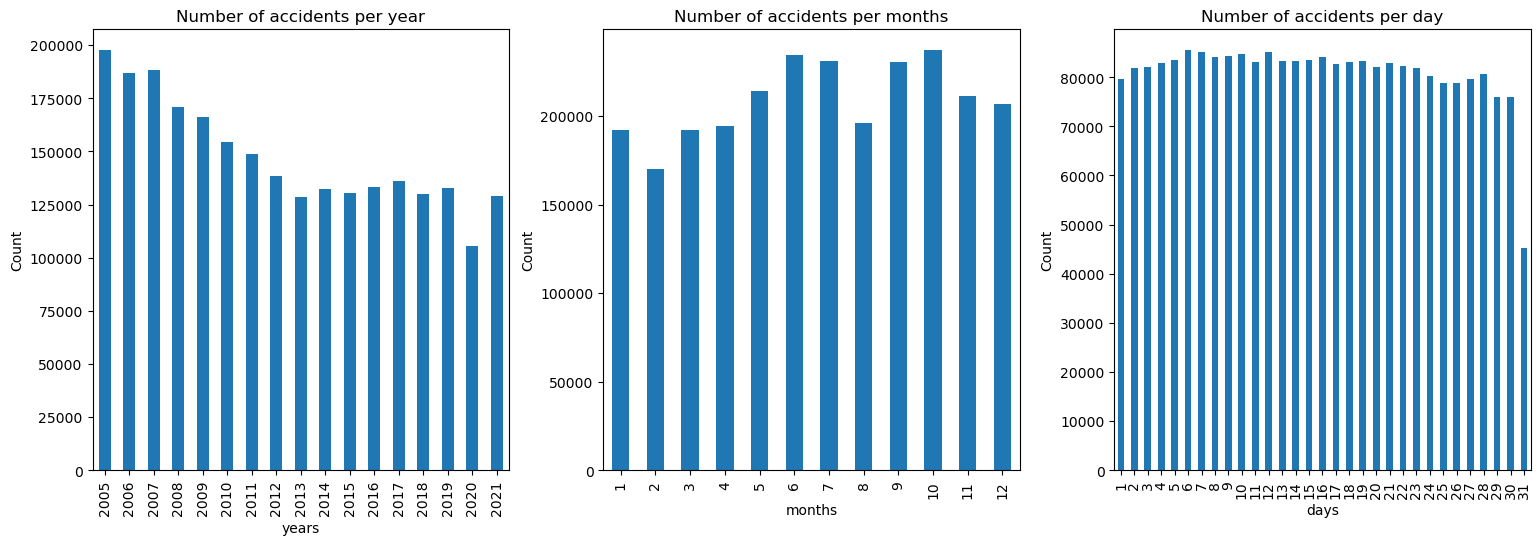

In [27]:
plt.figure(figsize=(15, 5))
# number of accidents per year
event_counts = df['an'].value_counts().sort_index()
plt.subplot(1,3,1)
plt.tight_layout(w_pad=6.0)
# Plot the event counts
event_counts.plot.bar()
plt.xlabel('years')
plt.ylabel('Count')
plt.title('Number of accidents per year')

#number of accidents per month
event_counts = df['mois'].value_counts().sort_index()
plt.subplot(1,3,2)
# Plot the event counts
event_counts.plot.bar()
plt.xlabel('months')
plt.ylabel('Count')
plt.title('Number of accidents per months')

#accidents per day of the month
event_counts = df['jour'].value_counts().sort_index()
plt.subplot(1,3,3)
# Plot the event counts
event_counts.plot.bar()
plt.xlabel('days')
plt.ylabel('Count')
plt.title('Number of accidents per day')


plt.show()

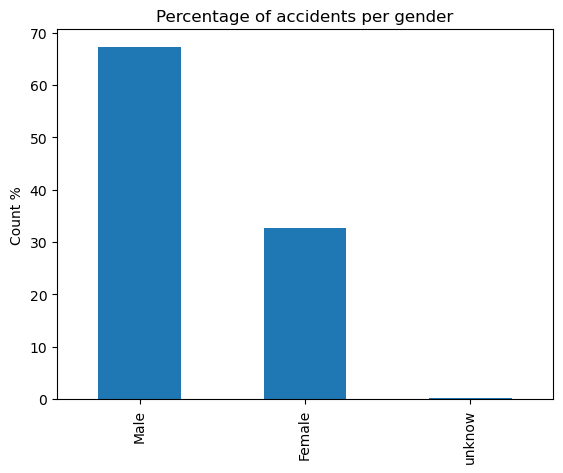

In [28]:
#number of accidents per gender

event_counts = df['sexe'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
event_percentages.plot.bar() 
labels = ['Male', 'Female', 'unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
#plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Percentage of accidents per gender')

plt.show()


## Filtering
### Drop non-metropolitan departments
It was decided to use only accidents in metropolitan France and Corse.

In preprocessing, the varible `metropolitan` with values `[0,1]` was created.

Now, the data is fitered by this variable and then it is dropped.

In [29]:
df = df.loc[df['metropolitan'] == 1]
df.drop('metropolitan', inplace=True, axis=1)

In [30]:
drop_columns = ['adr', 'lat', 'long']
df.drop(drop_columns, inplace = True, axis=1)

### Clean gravity
Gravity still contains data expressed by `-1` which is related to unknown injury. We need to remove this data.

In [31]:
unknown_count = (df['grav'] == -1).sum()

# Print the count
print(f"Number of data points with the value -1 in the 'grav' variable: {unknown_count}")

Number of data points with the value -1 in the 'grav' variable: 54


In [32]:
df = df[df['grav'] != -1]
df.isna().sum()

num_veh             0
place               0
catu                0
grav                0
sexe                0
an_nais             0
trajet              0
locp                0
actp                0
etatp               0
an                  0
mois                0
jour                0
hrmn                0
lum                 0
agg                 0
int                 0
atm                 0
col                 0
dep                 0
catr                0
circ                0
nbv                 0
vosp                0
prof                0
plan                0
surf                0
infra               0
situ                0
senc                0
catv                0
occutc              0
obs                 0
obsm                0
choc                0
manv                0
date                0
is_holiday          0
holiday       2367768
datetime            0
dtype: int64

### Encoding
For the first trial, use the `LabelEncoder` to encode categorial values. Then drop the old categorial values and replace them by the encoded.

In [33]:
# Encoding with LabelEncoder
encode_columns = ['actp', 'num_veh', 'etatp']
encoded_df = df[encode_columns]
encoded_df = encoded_df.astype('str')
encoded_df = encoded_df.apply(LabelEncoder().fit_transform)

# Merge encoded values
df.drop(encode_columns, inplace=True, axis=1)
df = pd.concat([df, encoded_df], axis=1)


<Figure size 1500x600 with 0 Axes>

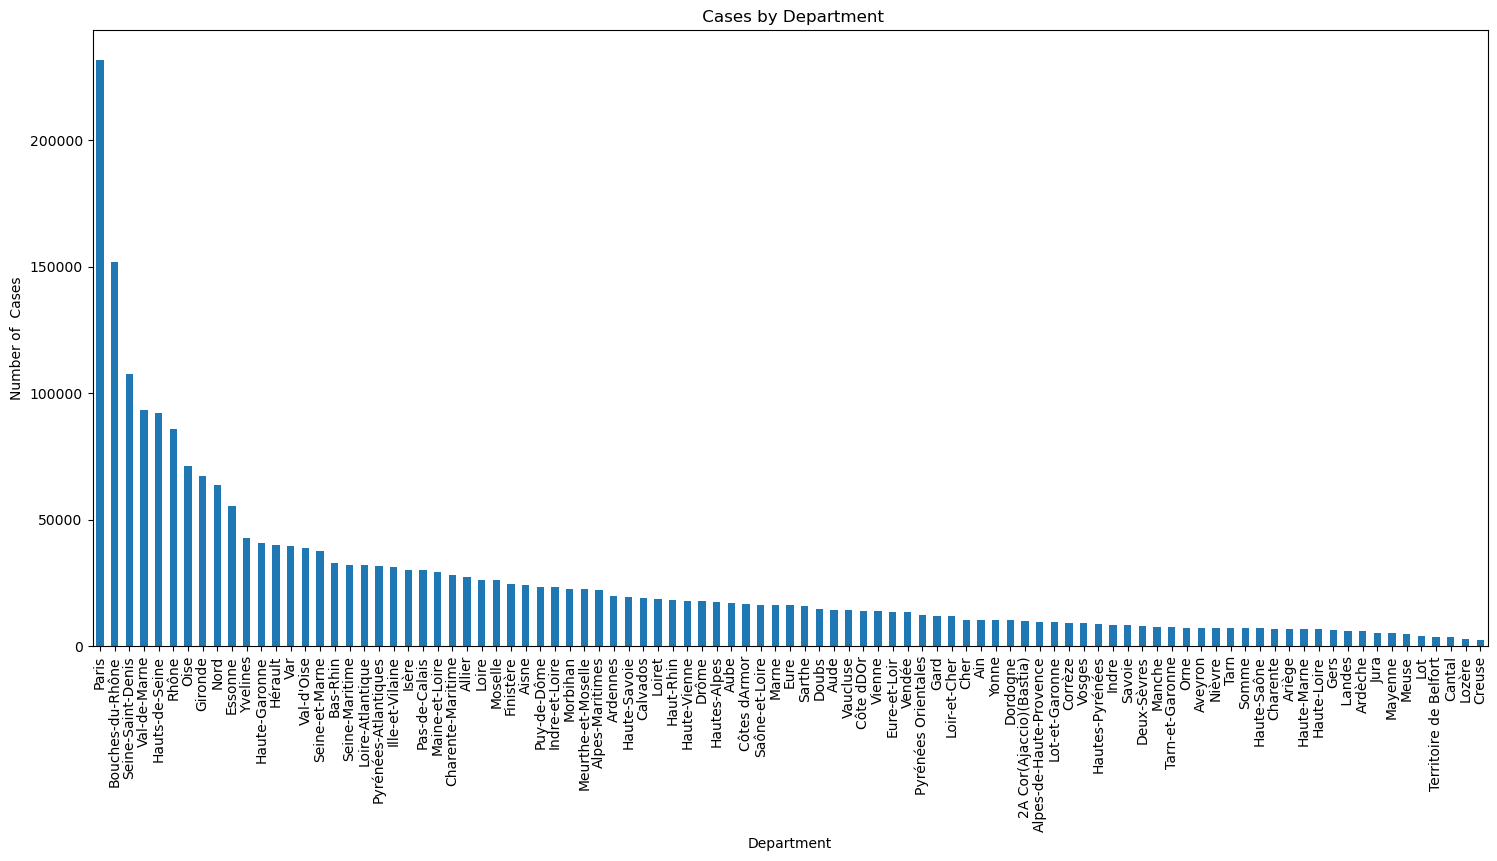

In [34]:
# number of accidents per department 

department_mapping = {
    'Ain': 1, 'Aisne': 2, 'Allier': 3, 'Alpes-de-Haute-Provence': 4, 'Hautes-Alpes': 5,
    'Alpes-Maritimes': 6, 'Ardèche': 7, 'Ardennes': 8, 'Ariège': 9, 'Aube': 10,
    'Aude': 11, 'Aveyron': 12, 'Bouches-du-Rhône': 13, 'Calvados': 14, 'Cantal': 15,
    'Charente': 16, 'Charente-Maritime': 17, 'Cher': 18, 'Corrèze': 19,
    '2A Cor(Ajaccio)(Bastia)': 20, 'Côte dDOr': 21,
    'Côtes dArmor': 22, 'Creuse': 23, 'Dordogne': 24, 'Doubs': 25, 'Drôme': 26,
    'Eure': 27, 'Eure-et-Loir': 28, 'Finistère': 29, 'Gard': 30, 'Haute-Garonne': 31,
    'Gers': 32, 'Gironde': 33, 'Hérault': 34, 'Ille-et-Vilaine': 35, 'Indre': 36,
    'Indre-et-Loire': 37, 'Isère': 38, 'Jura': 39, ' Landes': 40, 'Loir-et-Cher': 41,
    'Loire': 42, 'Haute-Loire': 43, 'Loire-Atlantique': 44, 'Loiret': 45, 'Lot': 46,
    'Lot-et-Garonne': 47, 'Lozère': 48, 'Maine-et-Loire': 49, 'Manche': 50, 'Marne': 51,
    'Haute-Marne': 52, 'Mayenne': 53, 'Moselle': 54, 'Meuse': 55, 'Morbihan': 56,
    'Meurthe-et-Moselle': 57, 'Nièvre': 58, 'Nord': 59, 'Oise': 60, 'Orne': 61,
    'Pas-de-Calais': 62, 'Puy-de-Dôme': 63, 'Pyrénées-Atlantiques': 64,
    'Hautes-Pyrénées': 65, 'Pyrénées Orientales': 66, 'Bas-Rhin': 67, 'Haut-Rhin': 68,
    'Rhône': 69, 'Haute-Saône': 70, 'Saône-et-Loire': 71, 'Sarthe': 72, 'Savoie': 73,
    'Haute-Savoie': 74, 'Paris': 75, 'Seine-Maritime': 76, 'Seine-et-Marne': 77,
    'Yvelines': 78, 'Deux-Sèvres': 79, 'Somme': 80, 'Tarn': 81, 'Tarn-et-Garonne': 82,
    'Var': 83, 'Vaucluse': 84, 'Vendée': 85, 'Vienne': 86, 'Haute-Vienne': 87,
    'Vosges': 88, 'Yonne': 89, 'Territoire de Belfort': 90, 'Essonne': 91,
    'Hauts-de-Seine': 92, 'Seine-Saint-Denis': 93, 'Val-de-Marne': 94, 'Val-d\'Oise': 95
}
# Reverse the department_mapping dictionary to map department numbers to names
department_mapping_reverse = {v: k for k, v in department_mapping.items()}


plt.figure(figsize=(15,6))
event_counts = df['dep'].value_counts()
acci_departments = event_counts.sort_values(ascending=False)

# Map department codes to department names for the x-axis labels
mapped_labels = [department_mapping_reverse.get(dep_code, dep_code) for dep_code in acci_departments.index]

# Plot the severity distribution
plt.figure(figsize=(18, 8))
ax = acci_departments.plot(kind='bar')
ax.set_xlabel('Department')
ax.set_ylabel('Number of  Cases')
ax.set_title(' Cases by Department')
ax.set_xticks(range(len(mapped_labels)))
ax.set_xticklabels(mapped_labels, rotation=90)



# Display the plot
plt.show();


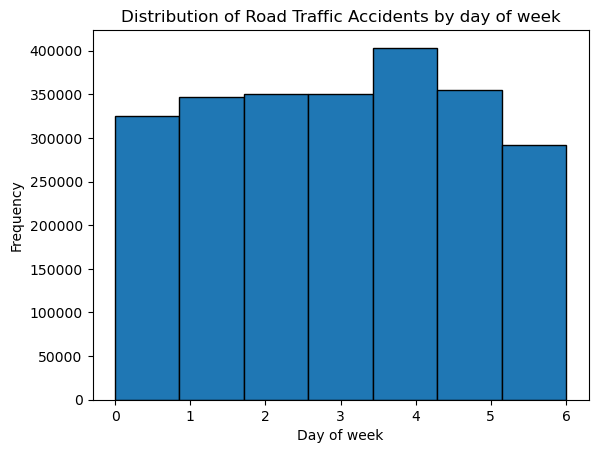

In [35]:
# Convert the 'datetime' column to a datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the weekday from the 'datetime' column
df['day_of_week'] = df['datetime'].dt.weekday

# Plot the distribution of road traffic accidents by the hour of the day
df['day_of_week'].plot(kind='hist', bins=7, edgecolor='k')
plt.xlabel('Day of week')
plt.ylabel('Frequency')
plt.title('Distribution of Road Traffic Accidents by day of week')
plt.show()

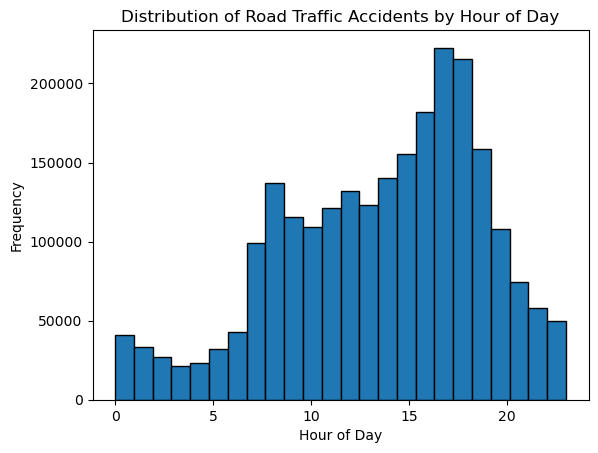

In [36]:
# Convert the 'datetime' column to a datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the hour of the day from the 'datetime' column
df['hour_of_day'] = df['datetime'].dt.hour

# Plot the distribution of road traffic accidents by the hour of the day
df['hour_of_day'].plot(kind='hist', bins=24, edgecolor='k')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Distribution of Road Traffic Accidents by Hour of Day')
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421684 entries, 201900000001 to 201800055766
Data columns (total 42 columns):
 #   Column       Dtype         
---  ------       -----         
 0   place        float64       
 1   catu         int64         
 2   grav         int64         
 3   sexe         int64         
 4   an_nais      int64         
 5   trajet       float64       
 6   locp         float64       
 7   an           int64         
 8   mois         int64         
 9   jour         int64         
 10  hrmn         object        
 11  lum          int64         
 12  agg          int64         
 13  int          int64         
 14  atm          float64       
 15  col          float64       
 16  dep          int64         
 17  catr         float64       
 18  circ         float64       
 19  nbv          float64       
 20  vosp         float64       
 21  prof         float64       
 22  plan         float64       
 23  surf         float64       
 24  infra   

In [38]:
#df.to_csv("./data/231030_clean_table_for_analysis.csv", sep = ',', header = True, na_rep = 'n/a', index=True)

In [12]:
import geopandas as gpd 
import pandas as pd
dfcarac=pd.read_csv("../data/features.csv", sep =",", encoding = "ISO-8859-1")

dfcarac.head(-10)


C:\Users\tiago\AppData\Local\Temp\ipykernel_20616\3412272392.py:3: DtypeWarning: Columns (4,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfcarac=pd.read_csv("../data/features.csv", sep =",", encoding = "ISO-8859-1")


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,metropolitan
0,200900000001,2009,1,30,2030,3,1,1,1.0,6.0,67,RTE DE GUÃ¯Â¿Â½MENÃ¯Â¿Â½,M,0.0,0.0,44,1.0
1,200900000002,2009,1,17,300,3,1,1,1.0,3.0,17,LE BOIS JOLI,M,0.0,0.0,44,1.0
2,200900000003,2009,1,29,645,3,1,1,1.0,3.0,52,NaN,M,0.0,0.0,44,1.0
3,200900000004,2009,1,4,615,3,1,1,9.0,6.0,44,LE BECO,M,0.0,0.0,44,1.0
4,200900000005,2009,1,16,1500,1,1,1,1.0,7.0,36,MOULIN DE LA GARENNE,M,0.0,0.0,44,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121556,200500087940,2005,12,11,1438,1,2,2,1.0,3.0,411.0,LABOURDONNAIS,NaN,NaN,NaN,974,0.0
1121557,200500087941,2005,12,1,1125,1,2,1,1.0,6.0,416.0,"46, HUBERT DE LISLE(BOUL",NaN,NaN,NaN,974,0.0
1121558,200500087942,2005,12,1,1740,1,2,2,1.0,6.0,416.0,"SANS, LEBLOND(RUE M. ET",NaN,NaN,NaN,974,0.0
1121559,200500087943,2005,12,3,1505,1,2,1,1.0,6.0,414.0,"sans, SAINT PHILIPPE(RUE",NaN,NaN,NaN,974,0.0


,Num_Acc,year,month,day,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,metropolitan,date
0,200900000001,202009,1,30,2030,3,1,1,1.0,6.0,67,RTE DE GUÃ¯Â¿Â½MENÃ¯Â¿Â½,M,0.0,0.0,44,1.0,NaT
1,200900000002,202009,1,17,300,3,1,1,1.0,3.0,17,LE BOIS JOLI,M,0.0,0.0,44,1.0,NaT
2,200900000003,202009,1,29,645,3,1,1,1.0,3.0,52,NaN,M,0.0,0.0,44,1.0,NaT
3,200900000004,202009,1,4,615,3,1,1,9.0,6.0,44,LE BECO,M,0.0,0.0,44,1.0,NaT
4,200900000005,202009,1,16,1500,1,1,1,1.0,7.0,36,MOULIN DE LA GARENNE,M,0.0,0.0,44,1.0,NaT


In [13]:
dfcarac['long'] = dfcarac['long'].replace('-', 0).fillna(0).astype('int')
dfcarac['lat'] = dfcarac['lat'].replace('-', 0).fillna(0).astype('int')
dfcaracMetro = dfcarac[(dfcarac['long']<2000000) & (dfcarac['lat'] > 3000000) & (dfcarac['lat'] < 5200000)]


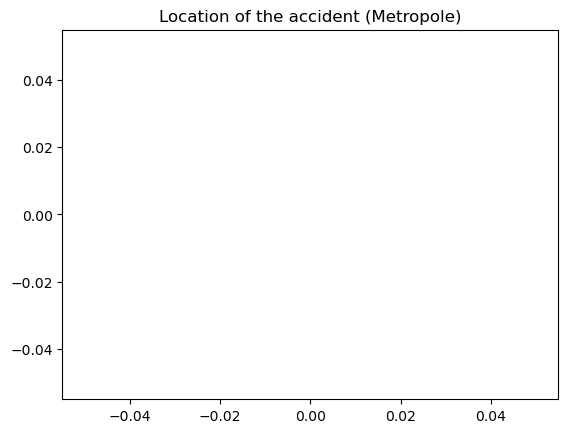

In [14]:
import matplotlib.pyplot as plt
 #plt.figure(figsize=(12,12))
plt.scatter(dfcaracMetro['long'], dfcaracMetro['lat'], s=0.1)
plt.title('Location of the accident (Metropole)')
plt.show()